In [1]:
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean as cm
from dask.distributed import Client
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Avoid the Runtime errors in true_divide encountered when trying to divide by zero
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)
warnings.filterwarnings('ignore', category = ResourceWarning)
warnings.filterwarnings('ignore', category = BytesWarning)

# matplotlib stuff:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['lines.linewidth'] = 2.0

import netCDF4 as nc
from collections import OrderedDict
import cftime
import glob
import copy

In [2]:
import logging
logger = logging.getLogger("distributed.utils_perf")
logger.setLevel(logging.ERROR)

In [3]:
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/45875/status,
Dashboard: /proxy/45875/status,Workers: 4
Total threads: 16,Total memory: 64.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43133,Workers: 4
Dashboard: /proxy/45875/status,Total threads: 16
Started: Just now,Total memory: 64.00 GiB
Comm: tcp://10.6.125.19:40175,Total threads: 4
Dashboard: /proxy/32829/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:37539,


In [4]:
db = '/scratch/x77/db6174/mom/archive/databases/1deg_jra55_ryf/cc_database_flux_forced_attempt1.db'
session_ffa1 = cc.database.create_session(db)

db = '/scratch/x77/db6174/access-om2/archive/databases/1deg_jra55_ryf/cc_database_vary_KPP_extended.db'
session_cont = cc.database.create_session(db)

session = [session_ffa1, session_cont]
expt = ['1deg_jra55_ryf_flux_forced_attempt1', '1deg_jra55_ryf_param_KPP_extended']

In [5]:
st = ['1900-01-01', '2000-01-01']
et = ['1900-02-28', '2004-12-31']

In [6]:
ncoarse = 12

x_min = [-100, -250, -70, -250]
x_max = [ 10 , -100,  20, -80 ]
y_min = [ 20 ,  20 , -80, -80 ]
y_max = [ 75 ,  75 , -55, -55 ]
basin = ['NA', 'NP', 'SA', 'SP']

## Wind stress

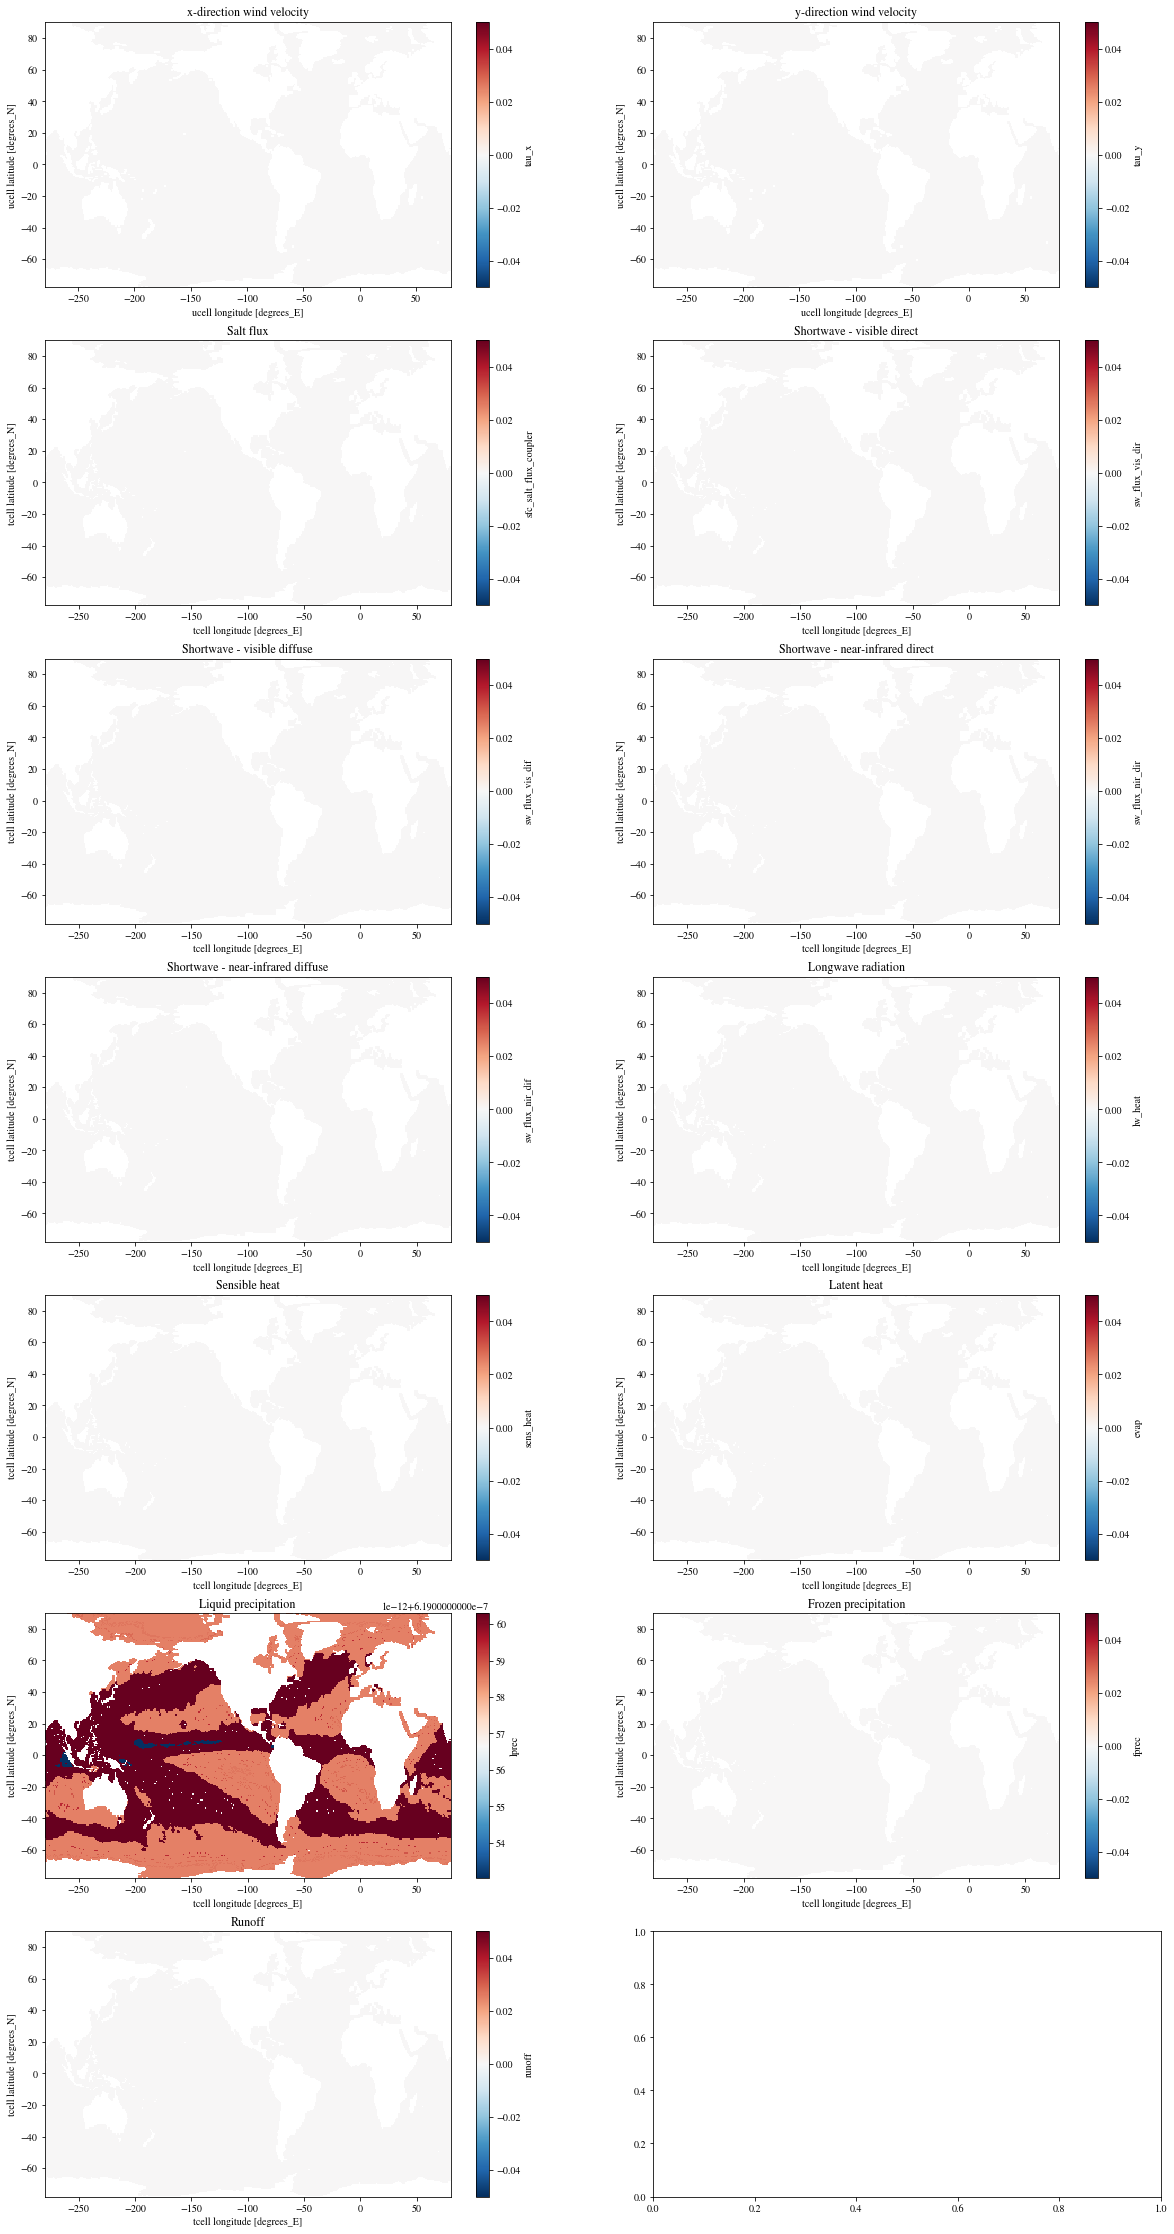

In [7]:
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (20, 40))

var_list = ['tau_x', 'tau_y', 'sfc_salt_flux_coupler', 'sw_flux_vis_dir', 'sw_flux_vis_dif', 'sw_flux_nir_dir', 
            'sw_flux_nir_dif', 'lw_heat', 'sens_heat', 'evap', 'lprec', 'fprec', 'runoff']

var_name = ['x-direction wind velocity' ,'y-direction wind velocity', 'Salt flux', 'Shortwave - visible direct', 'Shortwave - visible diffuse', 
           'Shortwave - near-infrared direct', 'Shortwave - near-infrared diffuse', 'Longwave radiation', 'Sensible heat', 'Latent heat', 
           'Liquid precipitation', 'Frozen precipitation', 'Runoff']

#var_list = ['tau_x', 'tau_y', 'sfc_salt_flux_coupler', 'lw_heat', 'sens_heat', 'evap', 'lprec', 'fprec', 'runoff', 'swflx']

#var_name = ['x-direction wind velocity' ,'y-direction wind velocity', 'Salt flux', 'Longwave radiation', 'Sensible heat', 
#            'Latent heat', 'Liquid precipitation', 'Frozen precipitation', 'Runoff', 'Shortwave radiation']


for i, j in enumerate(var_list):
    var_ffa2 = cc.querying.getvar(expt = expt[0], session = session[0], variable = j, frequency = '1 monthly').mean('time')
    
    var_cont = cc.querying.getvar(expt = expt[1], session = session[1], variable = j, frequency = '1 monthly').mean('time')
    
    (var_ffa2 - var_cont).plot(ax = axes[int(i/2)][int(i%2)], cmap = 'RdBu_r')
    axes[int(i/2)][int(i%2)].set_title(var_name[i])